In [1]:
import numpy as np
import pandas as pd
import math
import os
import sys


nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
from time_series.data_manager import DataManager
from time_series.models.AutoArima import AutoARIMA
from time_series.models.prophet import ProphetModel
from time_series.metrics import measure_error


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Get data from transation fact

In [4]:
data_manager = DataManager()

In [5]:
dfbyday, _, _, _ = data_manager.aggregate_data()
dfbyday.head()

,Hà Nội,Bình Dương,Đà Nẵng
created_at,,,
2018-11-02,5.0,7.0,1.0
2018-11-03,2.0,3.0,0.0
2018-11-04,6.0,2.0,1.0
2018-11-05,27.0,0.0,2.0
2018-11-06,27.0,9.0,4.0


# Auto Arima model

In [6]:
train_df = dfbyday[:'2019-09']
test_df = dfbyday['2019-10']


In [7]:
pd.plotting.register_matplotlib_converters()

In [8]:
warehouses = ['Hà Nội', 'Đà Nẵng', 'Bình Dương']
arima = []
forecast = []
conf_int = []
period = 31

for warehouse in warehouses:
    print(f'Fit ARIMA for {warehouse}')
    arima_by_warehouse = AutoARIMA(train_df, warehouse, None)
    forecast_by_warehouse, conf_int_by_warehouse = arima_by_warehouse.forecast(period)
    arima.append(arima_by_warehouse)
    forecast.append(forecast_by_warehouse)
    conf_int.append(conf_int_by_warehouse)

Fit ARIMA for Hà Nội
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=3032.257, BIC=3051.298, Fit time=0.703 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=3142.088, BIC=3149.705, Fit time=0.055 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=3028.618, BIC=3043.851, Fit time=0.988 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=3041.937, BIC=3057.170, Fit time=2.162 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=3047.358, BIC=3058.783, Fit time=0.207 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=3028.163, BIC=3047.204, Fit time=2.478 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=3008.504, BIC=3031.352, Fit time=6.249 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=3078.992, BIC=3098.033, Fit time=5.186 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=3010.521, BIC=3037.178, Fit time=8.035 seconds
Fit ARIMA: order

In [9]:
error_dfs = []
error_statistics = []

for i in range(len(warehouses)):
    error_df, error = measure_error(forecast[i], test_df, warehouses[i])
    error_dfs.append(error_df)
    error_statistics.append(error)
    print(f'Error of {warehouses[i]}')
    print(error)


Error of Hà Nội
{'Mean Squared Error': 20272.83870967742, 'Mean Absolute Error': 57.03225806451613, 'Mean Absolute Percentage Error': 0.44892029122695437, 'Correlation between forecast and actual values': 0.040518170738481234, 'Min-Max Error': 0.3645580810998329}
Error of Đà Nẵng
{'Mean Squared Error': 899.0645161290323, 'Mean Absolute Error': 19.06451612903226, 'Mean Absolute Percentage Error': 1.9107453033093633, 'Correlation between forecast and actual values': 0.12557422558248935, 'Min-Max Error': 0.5139936756320698}
Error of Bình Dương
{'Mean Squared Error': 1020.8064516129032, 'Mean Absolute Error': 16.096774193548388, 'Mean Absolute Percentage Error': 0.6295871742249443, 'Correlation between forecast and actual values': 0.15904688637602984, 'Min-Max Error': 0.36303789443437817}


![title](MAPE-values_W640.jpg)

In [10]:
for i in range(3):
    error_dfs[i] = error_dfs[i].set_index('date')

In [11]:
a = error_dfs[0].join(error_dfs[1], how='inner', lsuffix='_hanoi', rsuffix='_danang')
a = a.join(error_dfs[2], how='inner')
a.columns = ['actual_hanoi', 'forecast_hanoi', 'actual_danang', 'forecast_danang', 'actual_binhduong', 'forecast_binhduong']
a

,actual_hanoi,forecast_hanoi,actual_danang,forecast_danang,actual_binhduong,forecast_binhduong
date,,,,,,
2019-10-01,38.0,43.0,10.0,20.0,25.0,27.0
2019-10-02,42.0,48.0,26.0,21.0,16.0,20.0
2019-10-03,41.0,56.0,12.0,20.0,33.0,20.0
2019-10-04,61.0,49.0,10.0,21.0,14.0,19.0
2019-10-05,16.0,40.0,12.0,21.0,18.0,13.0
2019-10-06,26.0,32.0,6.0,21.0,17.0,8.0
2019-10-07,41.0,48.0,14.0,21.0,29.0,26.0
2019-10-08,65.0,43.0,15.0,21.0,30.0,19.0
2019-10-09,176.0,47.0,75.0,21.0,83.0,21.0


# Forecast plot

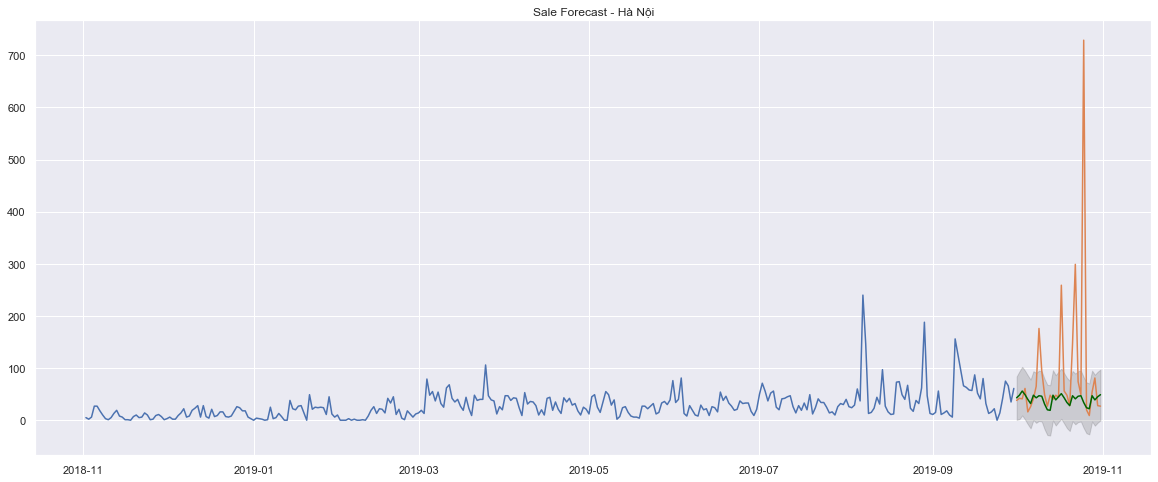

In [12]:
i = 0
arima[i].plot_forecast(31, forecast[i], conf_int[i], actual_df=test_df, title=f'Sale Forecast - {warehouses[i]}')

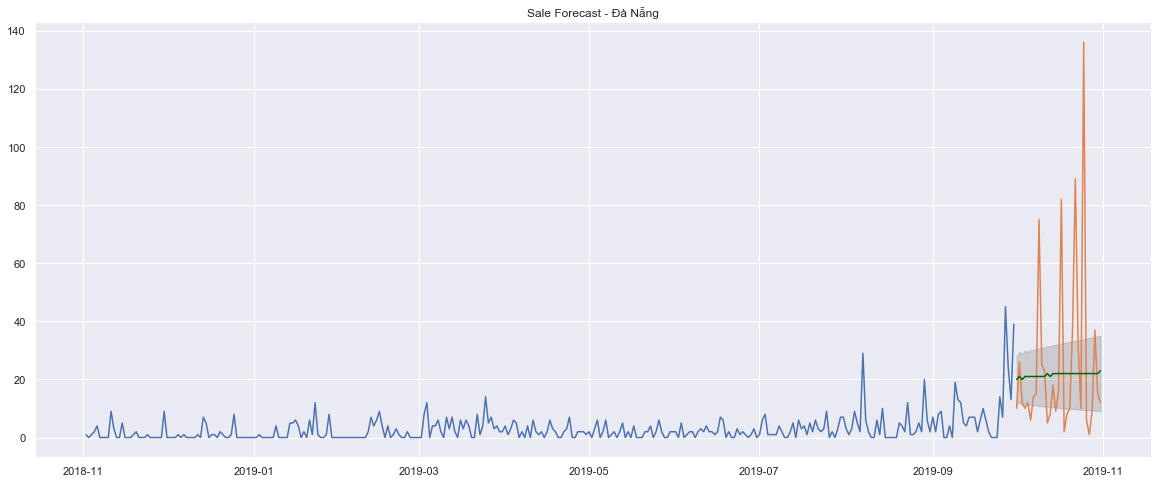

In [13]:
i = 1
arima[i].plot_forecast(31, forecast[i], conf_int[i], actual_df=test_df, title=f'Sale Forecast - {warehouses[i]}')

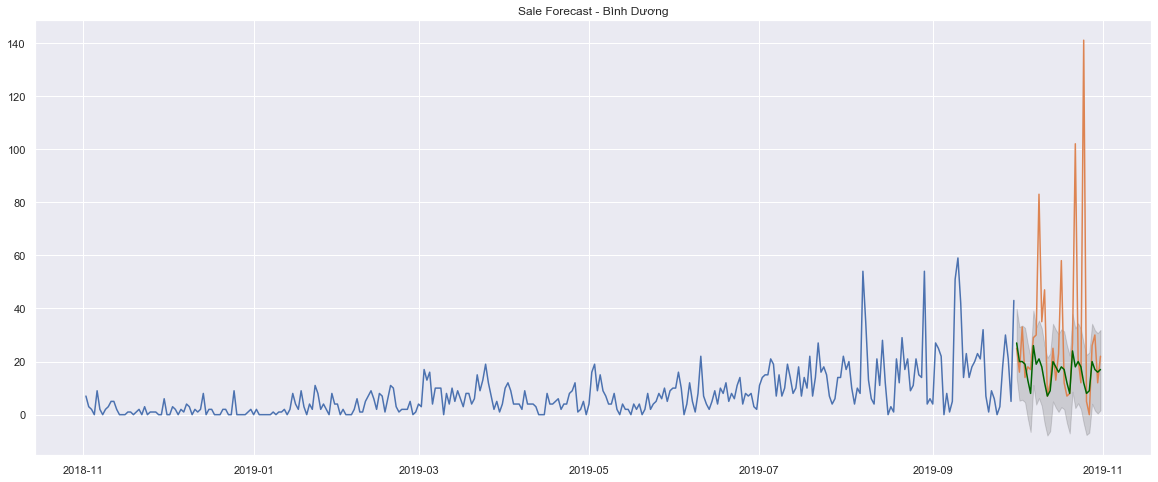

In [14]:
i = 2
arima[i].plot_forecast(31, forecast[i], conf_int[i], actual_df=test_df, title=f'Sale Forecast - {warehouses[i]}')

# Prophet

In [15]:
warehouses = ['Hà Nội', 'Đà Nẵng', 'Bình Dương']
prophet = []
forecast = []
preds = []
period = 31

for warehouse in warehouses:
    print(f'Predict for {warehouse}')
    prophet_by_warehouse = ProphetModel(train_df, warehouse)
    prophet_by_warehouse.fit()
    preds_by_warehouse, forecast_by_warehouse = prophet_by_warehouse.forecast(period)
    prophet.append(prophet_by_warehouse)
    forecast.append(forecast_by_warehouse)
    preds.append(preds_by_warehouse)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict for Hà Nội
Predict for Đà Nẵng
Predict for Bình Dương


In [16]:
error_dfs = []
error_statistics = []

for i in range(len(warehouses)):
    error_df, error = measure_error(preds[i][-1*period:], test_df, warehouses[i])
    error_dfs.append(error_df)
    error_statistics.append(error)
    print(f'Error of {warehouses[i]}')
    print(error)


Error of Hà Nội
{'Mean Squared Error': 19057.702371033232, 'Mean Absolute Error': 56.05511166807467, 'Mean Absolute Percentage Error': 0.5570577526065709, 'Correlation between forecast and actual values': 0.1766084802627233, 'Min-Max Error': 0.36630938925545176}
Error of Đà Nẵng
{'Mean Squared Error': 1116.8310506979697, 'Mean Absolute Error': 17.192633697324435, 'Mean Absolute Percentage Error': 0.7842653273732194, 'Correlation between forecast and actual values': 0.2706376083785337, 'Min-Max Error': 0.436258969503008}
Error of Bình Dương
{'Mean Squared Error': 935.6990317080795, 'Mean Absolute Error': 16.59672509264966, 'Mean Absolute Percentage Error': 1.0710032891013233, 'Correlation between forecast and actual values': 0.30049531766404486, 'Min-Max Error': 0.3900333323209201}


Text(0.5, 1, 'Sale forecast - Hà Nội')

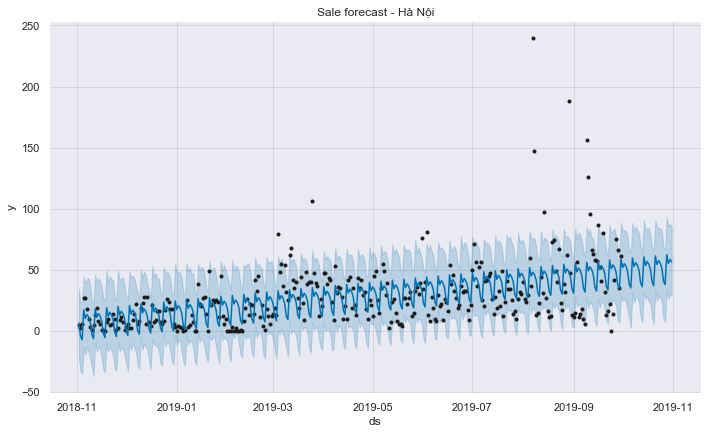

In [17]:
i = 0
prophet[i].plot_forecast(forecast[i])
plt.title(f'Sale forecast - {warehouses[i]}')

Text(0.5, 1, 'Sale forecast - Đà Nẵng')

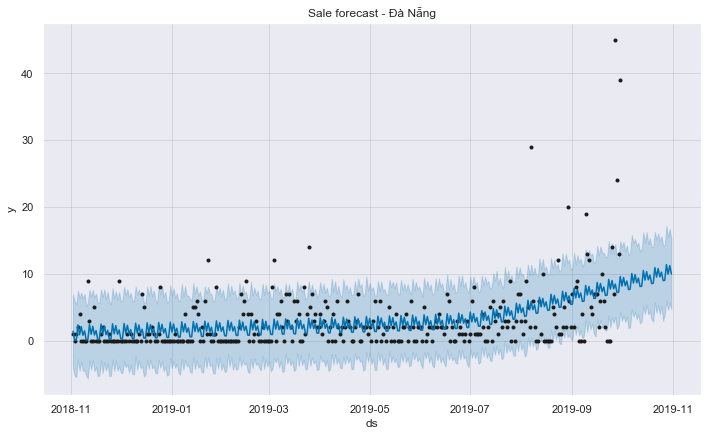

In [18]:
i = 1
prophet[i].plot_forecast(forecast[i])
plt.title(f'Sale forecast - {warehouses[i]}')

Text(0.5, 1, 'Sale forecast - Bình Dương')

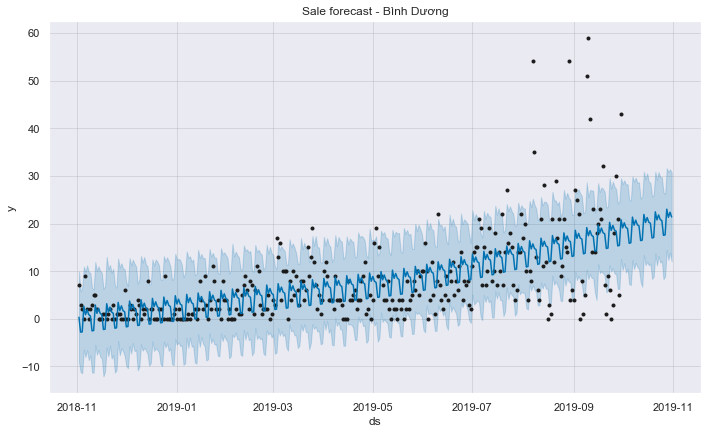

In [19]:
i = 2
prophet[i].plot_forecast(forecast[i])
plt.title(f'Sale forecast - {warehouses[i]}')

# Filter Outlier and test on ARIMA

In [20]:
filtered_dfbyday = dfbyday.copy(deep=True)

warehouses = ['Hà Nội', 'Bình Dương', 'Đà Nẵng']
for warehouse in warehouses:
    filtered_dfbyday[warehouse] = data_manager.filter_outlier(warehouse)

In [21]:
train_df = filtered_dfbyday[:'2019-09']
test_df = filtered_dfbyday['2019-10']

In [22]:
warehouses = ['Hà Nội', 'Đà Nẵng', 'Bình Dương']
arima = []
forecast = []
conf_int = []
period = 31

for warehouse in warehouses:
    print(f'Fit ARIMA for {warehouse}')
    arima_by_warehouse = AutoARIMA(train_df, warehouse, None)
    forecast_by_warehouse, conf_int_by_warehouse = arima_by_warehouse.forecast(period)
    arima.append(arima_by_warehouse)
    forecast.append(forecast_by_warehouse)
    conf_int.append(conf_int_by_warehouse)

Fit ARIMA for Hà Nội
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=2917.126, BIC=2936.166, Fit time=2.497 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=3017.644, BIC=3025.260, Fit time=0.079 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=2918.658, BIC=2933.890, Fit time=2.103 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=2933.721, BIC=2948.954, Fit time=2.348 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 7); AIC=2911.159, BIC=2934.008, Fit time=5.464 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 7); AIC=2916.915, BIC=2935.956, Fit time=2.799 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 2, 7); AIC=2876.690, BIC=2903.347, Fit time=8.423 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 2, 7); AIC=2889.777, BIC=2912.626, Fit time=7.435 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 0, 2, 7); AIC=2883.566, BIC=2914.031, Fit time=8.690 seconds
Fit ARIMA: order

In [23]:
error_dfs = []
error_statistics = []

for i in range(len(warehouses)):
    error_df, error = measure_error(forecast[i], test_df, warehouses[i])
    error_dfs.append(error_df)
    error_statistics.append(error)
    print(f'Error of {warehouses[i]}')
    print(error)


Error of Hà Nội
{'Mean Squared Error': 687.0124276015496, 'Mean Absolute Error': 17.929922135706338, 'Mean Absolute Percentage Error': 0.37900148751024687, 'Correlation between forecast and actual values': 0.2750845969047743, 'Min-Max Error': 0.28703017879726656}
Error of Đà Nẵng
{'Mean Squared Error': 145.50841931648193, 'Mean Absolute Error': 8.800889877641826, 'Mean Absolute Percentage Error': 0.7111457175003111, 'Correlation between forecast and actual values': -0.08498143851662793, 'Min-Max Error': 0.48242067909785324}
Error of Bình Dương
{'Mean Squared Error': 148.37321161443748, 'Mean Absolute Error': 8.60734149054505, 'Mean Absolute Percentage Error': 0.6957411761730833, 'Correlation between forecast and actual values': 0.3518611035730008, 'Min-Max Error': 0.33776498914203956}


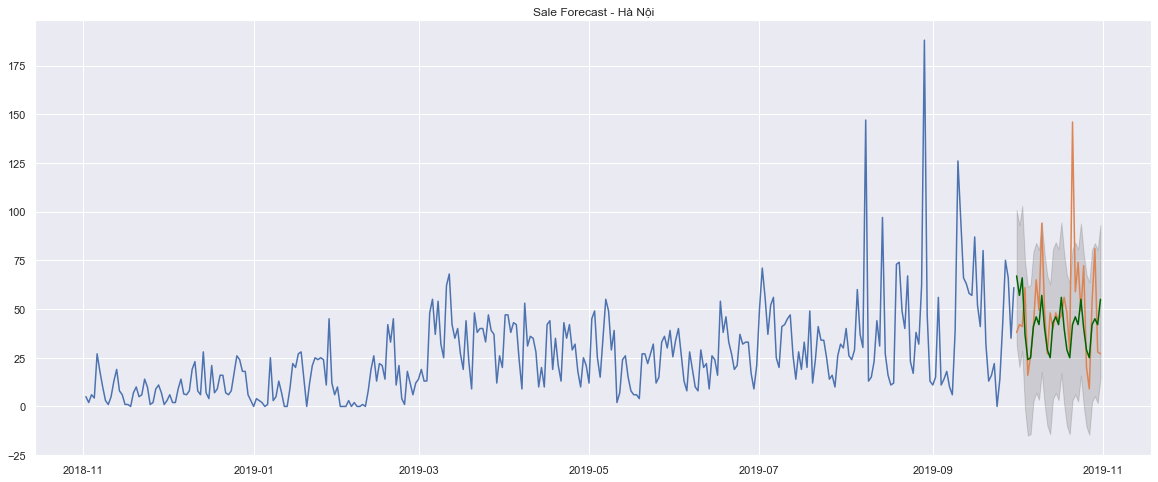

In [24]:
i = 0
arima[i].plot_forecast(31, forecast[i], conf_int[i], actual_df=test_df, title=f'Sale Forecast - {warehouses[i]}')

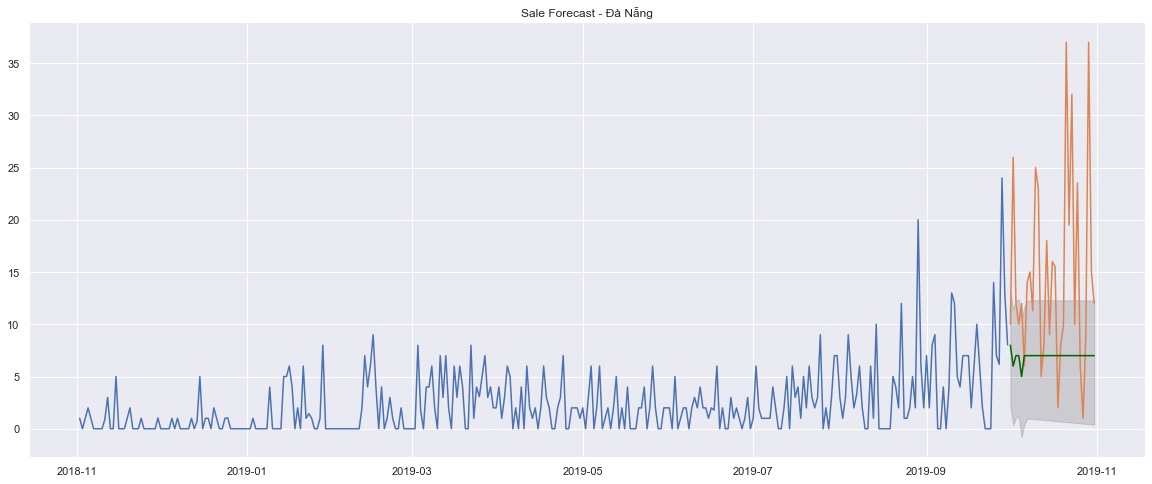

In [25]:
i = 1
arima[i].plot_forecast(31, forecast[i], conf_int[i], actual_df=test_df, title=f'Sale Forecast - {warehouses[i]}')

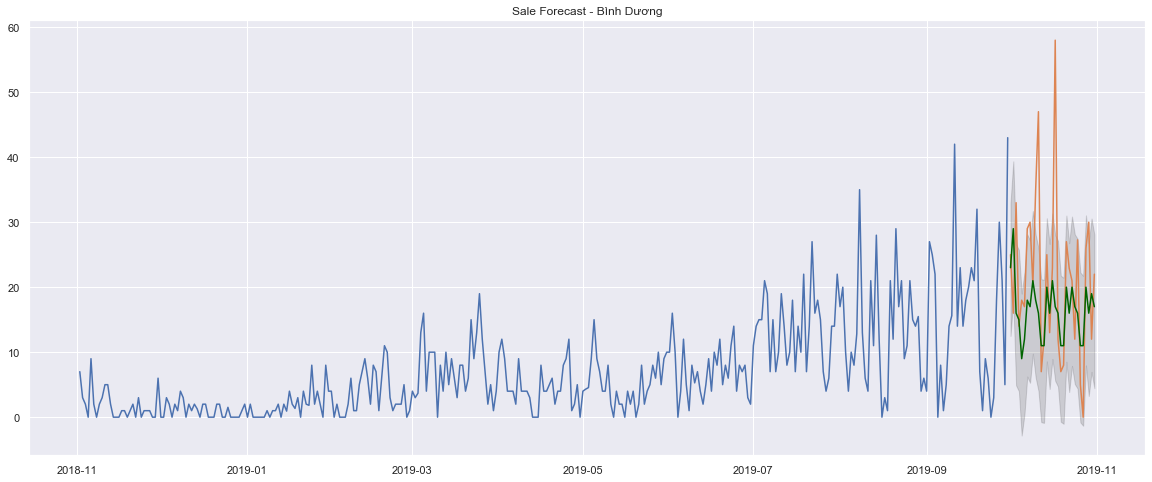

In [26]:
i = 2
arima[i].plot_forecast(31, forecast[i], conf_int[i], actual_df=test_df, title=f'Sale Forecast - {warehouses[i]}')